In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
import collections
import matplotlib.pyplot as plt

In [5]:
creditcard = pd.read_csv("creditcard.csv")
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
creditcard['normamount'] = StandardScaler().fit_transform(creditcard['Amount'].values.reshape(-1, 1))
creditcard['normtime'] = StandardScaler().fit_transform(creditcard['Time'].values.reshape(-1, 1))
creditcard = creditcard.drop(['Time','Amount'],axis=1)

In [33]:
creditcard.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normamount,normtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [60]:
creditcard.isnull().values.any()

False

Text(0,0.5,'Frequency')

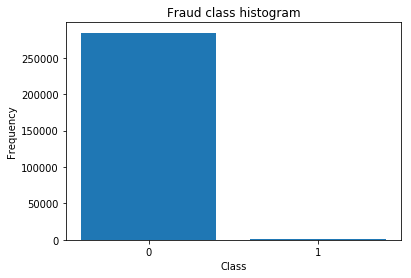

In [77]:
classes = pd.value_counts(creditcard['Class']).sort_index()
plt.bar(("0", "1"), count_classes)
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


In [54]:
y = creditcard['Class']
X = creditcard.drop('Class', axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)
print(sorted(collections.Counter(y_resampled).items()))


[(0, 227454), (1, 227454)]


In [58]:
from sklearn.model_selection import KFold
import numpy as np
def kfold_risk(X,y,regmod):
    """
    Construct the k-fold square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar MSE risk
    """
    kf = KFold(n_splits=5)
    kfold_losses = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = np.mean((y_hat - y_test)**2)
        kfold_losses.append(loss)
    return np.mean(kfold_losses)